# Part II - Ford GoBike System Feb 2019 Data Exploration
## by Michael Appiagyei






## Investigation Overview


>The goal of the investigation is to predict which factors affected trip distance in the FordGoBike data for February, 2019. Age and gender seem to be the main predictor of trip duration. Subscribers tend to record more trips but those trips are of shorter distances compared to customers. This may indicate normal commuting as opposed to customers who mainly used it for leisure and recorded high mean distances. There were also more trips done on weekdays than on weekends, however the average distance covered on weekends were higher than that of weekdays. This again indicates that on weekdays, riders use the bikes for short distances perhaps commutting to work and other places of business whereas on weekends, it is mainly used for leisure and other fun rides. 

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco bay area for the period of February, 2019. Some preliminary wrangling was done in the part one of the analysis. The resulting data was saved for use here.  The cleaned data set contains 174763 with 16 features. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fgbike = pd.read_csv('fordgobike_clean.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration in seconds

> The distribution of distribution of duration in seconds has a long tail as the range of values are large. When plotted on a log scale, it follows a normal distribution.



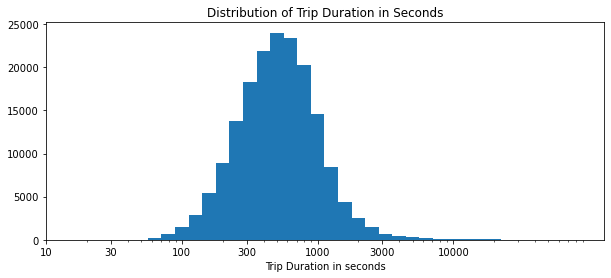

In [3]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(1.75, np.log10(fgbike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 4])
plt.hist(data = fgbike, x = 'duration_sec', bins = bins)
plt.xscale('log')
ticks =  [10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration in seconds')
plt.title('Distribution of Trip Duration in Seconds')
plt.show()

## Distributon of Age

> The age distribution also follows a somewhat normal distribution with some positive skew.

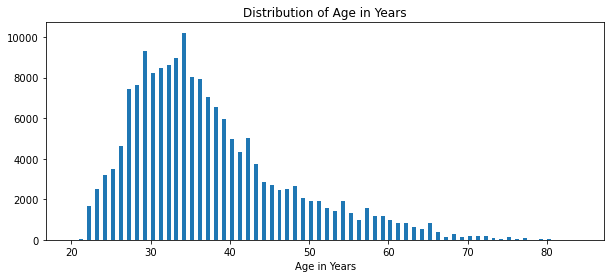

In [4]:
# plotting Age on a smaller bin size 
plt.figure(figsize=(10,4))

binsize = 0.5
bins = np.arange(20, fgbike['age'].max()+binsize, binsize)

plt.hist(data=fgbike, x='age', bins = bins);
plt.xlabel('Age in Years')
plt.title('Distribution of Age in Years')
plt.show()

## Age vs Duration by Gender

The number of males in the dataset greatly outnumbers that of the females. However, at longer trip distances, particularly when riders are between the ages of ~25 and ~40 years, we see that the females dominate that region

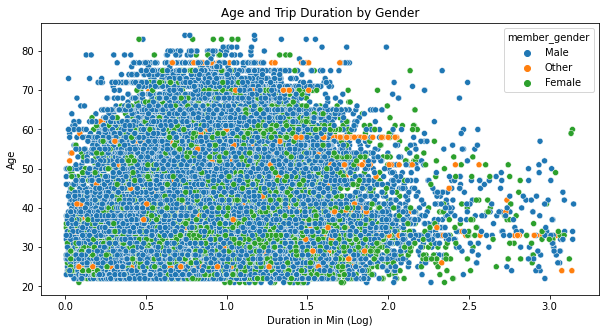

In [5]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=fgbike, y='age', x='duration_min', hue='member_gender')
plt.ylabel('Age')
plt.xlabel('Duration in Min (Log)')
plt.title('Age and Trip Duration by Gender')
plt.show();

## Day of the week vs Duration in Minutes by User Type
Subscribers cover relatively short distances. This explains why the mean distance for Customers is higher than that of customers although there are more subscriber bike trips

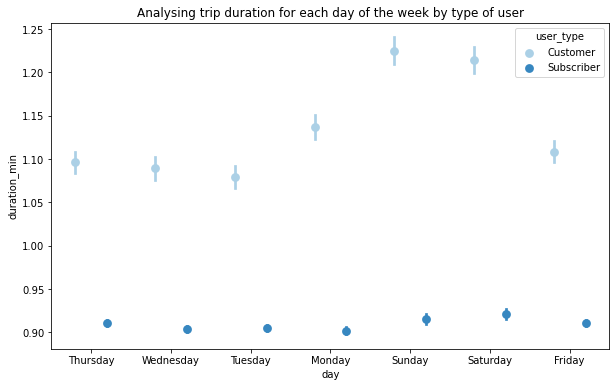

In [6]:
fig = plt.figure(figsize = [10,6])
ax = sb.pointplot(data = fgbike, x = 'day', y = 'duration_min', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Analysing trip duration for each day of the week by type of user')
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [7]:
!jupyter nbconvert Part_II_slide_deck_FordGoBike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_FordGoBike.ipynb to slides
[NbConvertApp] Writing 936600 bytes to Part_II_slide_deck_FordGoBike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\mappiagyei\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\mappiagyei\Anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\mappiagyei\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\mappiagyei\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\mappiagyei\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_note

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 